In [20]:
# First, data extraction.
# Primero, nos descargamos los datos

In [21]:
import pandas as pd
import yfinance as yf
tickers = ["DPW.DE","ALV.DE","BMW.DE","BAS.DE","FME.DE"]
startinput = "2019-01-01"
endinput = "2019-12-31"
S=pd.DataFrame()
for t in tickers:
    data= yf.download(tickers = t,
                        start=startinput,
                        end=endinput,
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )
    display(data["Adj Close"])
    S[t]=data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    20.769207
2019-01-03    20.379623
2019-01-04    21.124161
2019-01-07    21.279997
2019-01-08    21.548378
                ...    
2019-12-19    30.870659
2019-12-20    31.091545
2019-12-23    30.667795
2019-12-27    31.019417
2019-12-30    30.663284
Name: Adj Close, Length: 251, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    150.678268
2019-01-03    149.094009
2019-01-04    152.710281
2019-01-07    151.470398
2019-01-08    151.625397
                 ...    
2019-12-19    197.003433
2019-12-20    198.623016
2019-12-23    198.488052
2019-12-27    198.488052
2019-12-30    196.508575
Name: Adj Close, Length: 251, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    59.891392
2019-01-03    59.298836
2019-01-04    61.583191
2019-01-07    61.935295
2019-01-08    62.012585
                ...    
2019-12-19    66.995026
2019-12-20    67.040237
2019-12-23    66.488724
2019-12-27    66.461601
2019-12-30    66.127075
Name: Adj Close, Length: 251, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    48.283276
2019-01-03    47.726646
2019-01-04    50.247360
2019-01-07    50.016762
2019-01-08    50.271217
                ...    
2019-12-19    55.965244
2019-12-20    56.505852
2019-12-23    56.173172
2019-12-27    56.472584
2019-12-30    56.015144
Name: Adj Close, Length: 251, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    52.501606
2019-01-03    50.979019
2019-01-04    54.225971
2019-01-07    53.932465
2019-01-08    53.272068
                ...    
2019-12-19    61.578072
2019-12-20    61.862541
2019-12-23    61.976330
2019-12-27    63.190056
2019-12-30    62.545269
Name: Adj Close, Length: 251, dtype: float64

In [6]:
import numpy as np

In [24]:
# BHS Bootstrap Historical Simulation

In [8]:
# Second Part. BHS VaR calculation for the portfolio.
# Segunda parte. 
import matplotlib.pyplot as plt
# we want to calculate the VaR of the portfolio returns over p days.
# for this , we produce s simulations for the portfolio returns over p days.
# This is done through the bootstrap, by choosing with replacement p vectors of stocks returns,
# amongst the n calculated

# Vamos a calcular el VaR del returno del portfolio sobre p dias.
# Para esto, vamos a hacer s simulaciones para el portfolio sobre p dias.
# Para esto usamos bootstrap, reemplazando p vectors del retorno de los stocks, 
# entre los n calculados.

In [25]:
d = len(tickers) # number of stocks considered
# cantidad de stocks considerados

In [10]:
p = 10 # number of daily returns considered in each bootstrap simulation
# numero de daily returns para cada simulacion. Aca vamos a hacer un VaR a 10 dias, por ello p=10.

s= 10000 # number of bootstrap simulation
# vamos a hacer 10 mil simulaciones bootstrap.

R = pd.DataFrame() # creation of data frame that will contain the five stocks returns
# en R, es un dataframe pandas donde vamos a guardar los retornos de nuestros 5 stocks.

In [13]:
# Calculamos los retornos
for t in tickers: R[t] = S[t] / S[t].shift(1) -1 # calculate the stock returns form the closing price 
R= R[1:] # eliminate the first value


# Definimos un peso fijo cada para activo. Usamos 1/N.
# definition of the weights portfolio
w = np.zeros(d)
for i in range(d):
    w[i] = 1.0/d # arbitraty constant choice 


[-0.07270287 -0.07017402]
The VaR 99%  is: -7.017 %


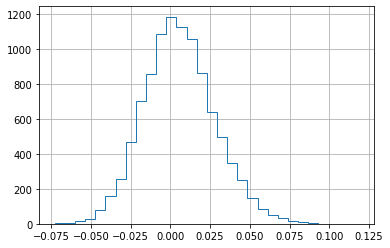

In [19]:
### METODO BOOTSTRAP ####


# bootstrap method used in each of the s simulations
n = len(R.index) # number of vector of returns form the sample 
perf = np.zeros(s)  # array where the portfolio return is saved for each simulation
# En perf vamos a guardar los retornos del portfolio en cada simulacion
for i in range(s):
    idx = np.random.choice(n,p) # select with replacement p vectors of returns amongst n
    RB = R.iloc[idx] # extract the p vectors of returns from the return data frame
    RBP = np.prod(RB+1)-1 # calculate the return over p days for each stock
    perf[i] = RBP.dot(w) # calculate the portfolio return over p days
plt.hist(perf,30,histtype="step") # histogram for the portfolio return with 30 buckets
plt.grid(True) # grid added to the histogram

var_99 = np.percentile(perf,[0,0.01])
print(var_99)
var_99_f = round(var_99[1]*100,3)
print("The VaR 99%  is:",var_99_f,"%")


The result we get from the program for the VaR99% is -7.01%. So in dollar terms, a one million dollar portfolio is not expected, with a 99% chance, to suffer over a 10 business day period, a loss of over 70.170 USD.